In [11]:
import torch 
import torch.optim as optim 
import torch.nn as nn

torch.manual_seed(42)

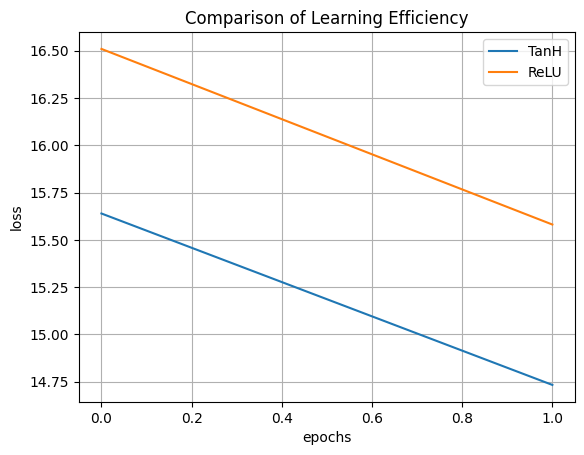

In [12]:
import matplotlib.pyplot as plt 

X = torch.rand(100, 1) * 2
y = X*3 + 1

class ComparisonTanhFirst(nn.Module):
    def __init__(self):
        super(ComparisonTanhFirst, self).__init__()
        self.fc_1 = nn.Linear(1, 10)
        self.fc_2 = nn.Linear(10, 10)
        self.fc_3 = nn.Linear(10, 1)

        self.activation_1 = nn.Tanh()
        self.activation_2 = nn.ReLU()
        self.activation_3 = nn.Sigmoid()

    def forward(self, x):
        x = self.activation_1(self.fc_1(x))
        x = self.activation_2(self.fc_2(x))
        x = self.activation_3(self.fc_3(x))

        return x 

class ComparisonReLUFirst(nn.Module):
    def __init__(self):
        super(ComparisonReLUFirst, self).__init__()

        self.fc_1 = nn.Linear(1, 10)
        self.fc_2 = nn.Linear(10, 10)
        self.fc_3 = nn.Linear(10, 1)

        self.activation_1 = nn.ReLU()
        self.activation_2 = nn.Tanh()
        self.activation_3 = nn.Sigmoid()

    def forward(self, x):
        x = self.activation_1(self.fc_1(x))
        x = self.activation_2(self.fc_2(x))
        x = self.activation_3(self.fc_3(x))

        return x 
    
model_one = ComparisonTanhFirst()
model_two = ComparisonReLUFirst()

optimizer_one = optim.SGD(model_one.parameters(), lr=0.1)
optimizer_two = optim.SGD(model_two.parameters(), lr=0.1)

num_epochs = 2
loss_history = {"tanh": [], "relu": []}
criterion = nn.MSELoss()

for epoch in range(num_epochs):
    for model, optimizer, name in zip([model_one, model_two], [optimizer_one, optimizer_two], ["tanh", "relu"]):
        optimizer.zero_grad()

        y_pred = model(X)
        loss = criterion(y_pred, y)
        loss.backward()
        optimizer.step()

        loss_history[name].append(loss.item())


plt.plot(loss_history['tanh'], label="TanH")
plt.plot(loss_history['relu'], label='ReLU')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title("Comparison of Learning Efficiency")
plt.legend()
plt.grid()
plt.show()

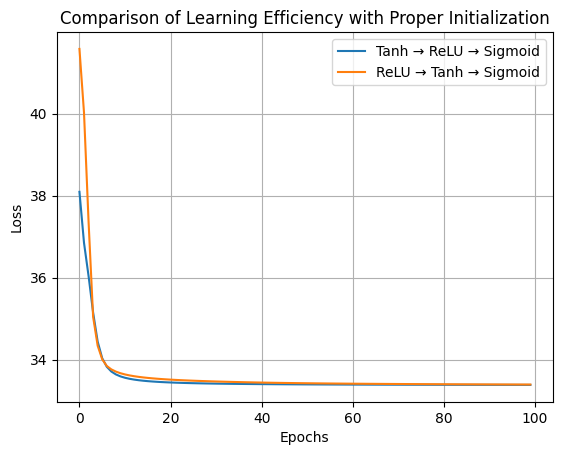

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Set random seed for reproducibility
torch.manual_seed(42)

# Generate synthetic data (normalized to mean=0, std=1)
X = torch.randn(100, 1) * 2  # Standardized inputs
y = 3 * X + 2  # Linear ground truth

# Define models with different activation orders
class Net_Tanh_ReLU_Sigmoid(nn.Module):
    def __init__(self):
        super(Net_Tanh_ReLU_Sigmoid, self).__init__()
        self.fc1 = nn.Linear(1, 10)
        self.fc2 = nn.Linear(10, 10)
        self.fc3 = nn.Linear(10, 1)

        # Proper weight initialization for Tanh
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)

        self.activation1 = nn.Tanh()
        self.activation2 = nn.ReLU()
        self.activation3 = nn.Sigmoid()

    def forward(self, x):
        x = self.activation1(self.fc1(x))
        x = self.activation2(self.fc2(x))
        x = self.activation3(self.fc3(x))
        return x

class Net_ReLU_Tanh_Sigmoid(nn.Module):
    def __init__(self):
        super(Net_ReLU_Tanh_Sigmoid, self).__init__()
        self.fc1 = nn.Linear(1, 10)
        self.fc2 = nn.Linear(10, 10)
        self.fc3 = nn.Linear(10, 1)

        # Proper weight initialization for ReLU
        nn.init.kaiming_uniform_(self.fc1.weight, nonlinearity='relu')
        nn.init.kaiming_uniform_(self.fc2.weight, nonlinearity='relu')
        nn.init.kaiming_uniform_(self.fc3.weight, nonlinearity='relu')

        self.activation1 = nn.ReLU()
        self.activation2 = nn.Tanh()
        self.activation3 = nn.Sigmoid()

    def forward(self, x):
        x = self.activation1(self.fc1(x))
        x = self.activation2(self.fc2(x))
        x = self.activation3(self.fc3(x))
        return x

# Instantiate models
model_tanh_relu_sigmoid = Net_Tanh_ReLU_Sigmoid()
model_relu_tanh_sigmoid = Net_ReLU_Tanh_Sigmoid()

# Define optimizers
optimizer_tanh_relu = optim.SGD(model_tanh_relu_sigmoid.parameters(), lr=0.1)
optimizer_relu_tanh = optim.SGD(model_relu_tanh_sigmoid.parameters(), lr=0.1)

# Training loop
num_epochs = 2
loss_history = {"Tanh-ReLU-Sigmoid": [], "ReLU-Tanh-Sigmoid": []}
criterion = nn.MSELoss()

for epoch in range(num_epochs):
    for model, optimizer, name in zip(
        [model_tanh_relu_sigmoid, model_relu_tanh_sigmoid],
        [optimizer_tanh_relu, optimizer_relu_tanh],
        ["Tanh-ReLU-Sigmoid", "ReLU-Tanh-Sigmoid"]
    ):
        optimizer.zero_grad()
        y_pred = model(X)
        loss = criterion(y_pred, y)
        loss.backward()
        optimizer.step()

        loss_history[name].append(loss.item())

# Plot loss curves
plt.plot(loss_history["Tanh-ReLU-Sigmoid"], label="Tanh → ReLU → Sigmoid")
plt.plot(loss_history["ReLU-Tanh-Sigmoid"], label="ReLU → Tanh → Sigmoid")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Comparison of Learning Efficiency with Proper Initialization")
plt.legend()
plt.grid()
plt.show()
